<a href="https://colab.research.google.com/github/SirilukLee/MachineLearning-KMITL/blob/main/My_2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

K-Nearest Neighbors (K-NN) is one of the simplest machine learning algorithms. When a new situation occurs, it scans through all past experiences and looks up the k closest experiences. 

Those experiences (or: data points) are what we call the k nearest neighbors.

Credit: [Introduction to k-Nearest Neighbors: A powerful Machine Learning Algorithm (with implementation in Python & R)](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

## When do we use KNN algorithm?

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power

![comparison](https://www.analyticsvidhya.com/wp-content/uploads/2014/10/Model-comparison.png)

## How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors.

K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. 

![knn1](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

KNN has the following basic steps:
1. Calculate distance
2. Find closest neighbors
3. Vote for labels

![knn1](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)


### Curse of Dimensionality

**KNN performs better with a lower number of features than a large number of features.**

You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting.

To deal with the problem of **the curse of dimensionality**, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. 



## How do we choose the factor K?

Let’s try to see the effect of value “K” on the class boundaries. The following are the different boundaries separating the two classes with different values of K.

![knn3](https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png)

![knn4](https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement2.png)

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority. 

**Following is the validation error curve with varying value of K:**

![validation_error](https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error_11.png)

**We plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.**

In [ ]:
## KNN เหมาะกับมีตัวแปรต้นไม่เยอะ
## KNN เป็นเรื่องของการคำนวนระยะทาง ดังนั้นหากตัวแปรข้อมูลเลขห่างกัน ควรทำ normalize หรือ standardize

# Let's build a simple KNN classifier
Credit: [KNN Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1012728&gclid=Cj0KCQjwp86EBhD7ARIsAFkgakjWiH07aCPyK3AK8Mho9GhII0-UAiqLF9yQ8VVb1n9wnuhAiGcU4TYaAttVEALw_wcB)

Let's first create your a dataset.

In this dataset, you have two features (weather and temperature) and one label(play).



In [6]:
import pandas as pd

# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df = pd.DataFrame({'weather': weather, 'temp': temp, 'play': play})
df

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


## Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.



In [7]:
new_df = df.replace(to_replace={'weather': {'Sunny': 2, 'Rainy': 1, 'Overcast':0 }})

new_df.replace(to_replace={'temp': {'Hot': 2, 'Mild': 1, 'Cool':0 }}, inplace=True)

new_df.replace(to_replace={'play': {'No': 0, 'Yes': 1 }}, inplace=True)
new_df

,weather,temp,play
0,2,2,0
1,2,2,0
2,0,2,1
3,1,1,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,1,0
8,2,0,1
9,1,1,1


In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split

features = new_df.drop(labels='play', axis=1)
target = new_df['play']

model = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training sets
model.fit(features, target)

#Predict Output
predicted= model.predict([[2,2]]) # 0:Overcast, 2:Hot
print(predicted)


[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


# KNN with Multiple Classes

## Iris Data Set

**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica





In [4]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [9]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.shape

(150, 5)

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
# 120 training set, 30 test set

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 

For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training set:', X_train[:5])

print('Test set:', X_test[:5])

Training set: [[ 0.76416119 -0.17706093  1.11810042  1.24773749]
 [-0.42673937 -1.39817078  0.10928801  0.09892548]
 [ 0.76416119 -0.17706093  0.94996502  0.73715437]
 [-0.0694692  -0.90972684  0.05324288 -0.0287203 ]
 [ 1.12143136 -0.17706093  0.94996502  1.12009171]]
Test set: [[-0.42673937  2.75360271 -1.34788547 -1.30517809]
 [-0.54582942  2.0209368  -1.4039306  -1.04988653]
 [-1.02218964  1.04404892 -1.2357952  -0.79459498]
 [ 1.59779158 -0.17706093  1.11810042  0.48186282]
 [ 1.35961147  0.31138301  0.50160395  0.22657126]]


In [14]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

# Make prediciton
y_pred = classifier.predict(X_test)

print('Predictions:', y_pred)

Predictions: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [15]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to have a good result.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

In [16]:
error = []

# Calculating error for K values between 1 and 100
for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred_k = knn.predict(X_test)
  error.append(np.mean(pred_k != y_test))  #pred_k != y_test --> ให้ค่าเป็นหนึ่งเมื่อทำนายผิด เพราะดู error เมื่อทำนายผิดจะได้ค่าสูงๆ
error

[0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.1,
 0.1,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.1,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.2,
 0.2,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.166666666666666

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

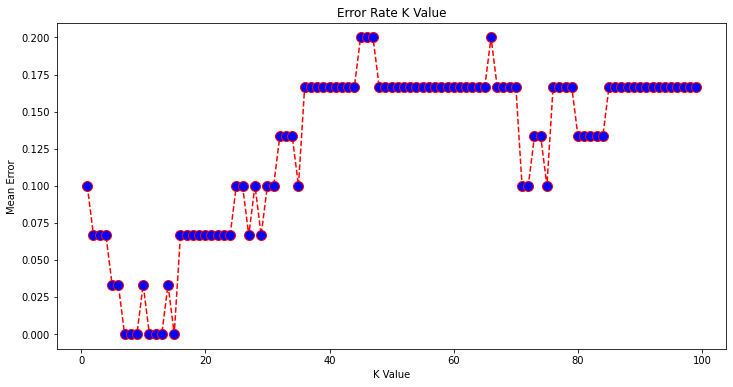

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')